
## Image Segmentation: Part 1
https://towardsdatascience.com/image-segmentation-part-1-9f3db1ac1c50


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

from os import chdir
chdir('gdrive/MyDrive/Image-Segmentation')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('classic')
plt.rcParams['axes.grid'] = True

In [3]:
def show(pic, ax = None):
    if ax:
        ax.imshow(pic, cmap = 'gray')
    else:
        plt.imshow(pic, cmap = 'gray')
        
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

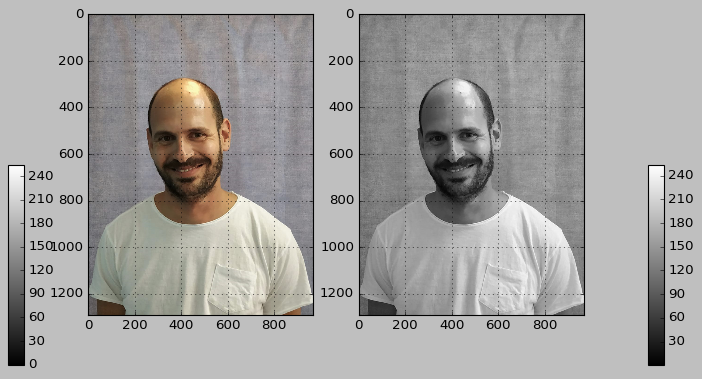

In [4]:
# show original image in b/w
pic = plt.imread('uri.jpeg')
pic_bw = rgb2gray(pic)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8,5))
cax = fig.add_axes([0, 0, 0.025, 0.5])
im = ax1.imshow(pic, cmap = 'gray')
fig.colorbar(im, cax = cax)

cax2 = fig.add_axes([1, 0, 0.025, 0.5])
im = ax2.imshow(pic_bw, cmap = 'gray')
fig.colorbar(im, cax = cax2)

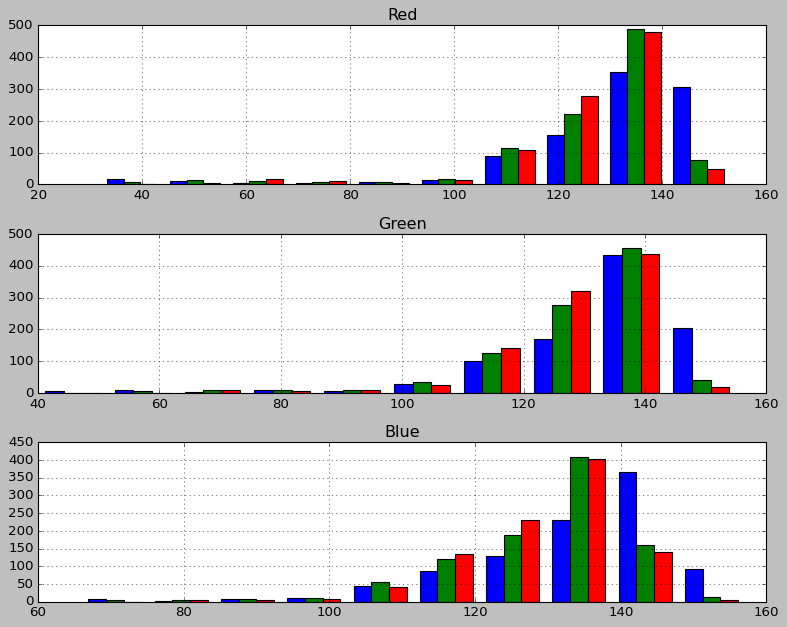

In [5]:
# show channels histograms. more values on blue?
channels = ['Red','Green','Blue']
fig, axes = plt.subplots(figsize = (10,8), nrows = 3)
for i, c in enumerate(channels):
    axes[i].hist(pic[i])
    axes[i].set_title(c)
plt.tight_layout()

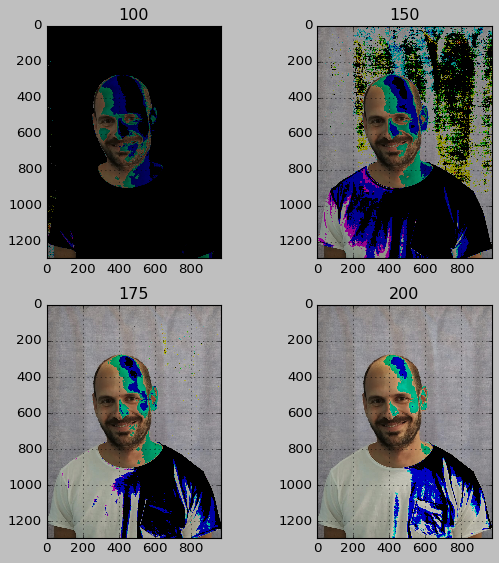

In [6]:
# show only pixels which are above a certain threshold
fig, axes = plt.subplots(figsize = (8,8), ncols = 2, nrows = 2)
for i,t in enumerate([100,150,175,200]):
    show(np.where(pic > t, 0, pic), ax = axes.flatten()[i])
    axes.flatten()[i].set_title(str(t))

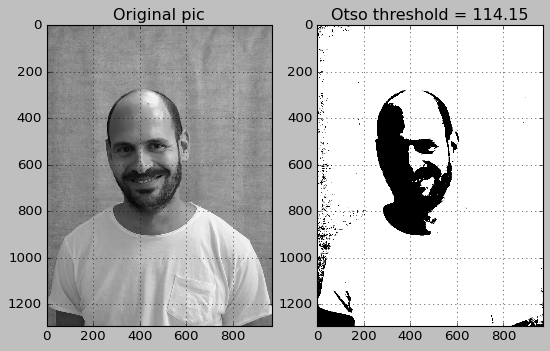

In [7]:
# Otsu Method (automatic thresholding)

from skimage.filters import threshold_otsu
thresh = threshold_otsu(pic_bw)
pic_ot = pic_bw > thresh

fig, axes = plt.subplots(1,2,figsize = (8,5))
show(pic_bw, axes[0])
axes[0].set_title('Original pic')
show(pic_ot, axes[1])
axes[1].set_title(f'Otso threshold = {thresh:.2f}');

## HSV color segmentation

https://towardsdatascience.com/image-segmentation-part-1-6e0ddb5f7f8a

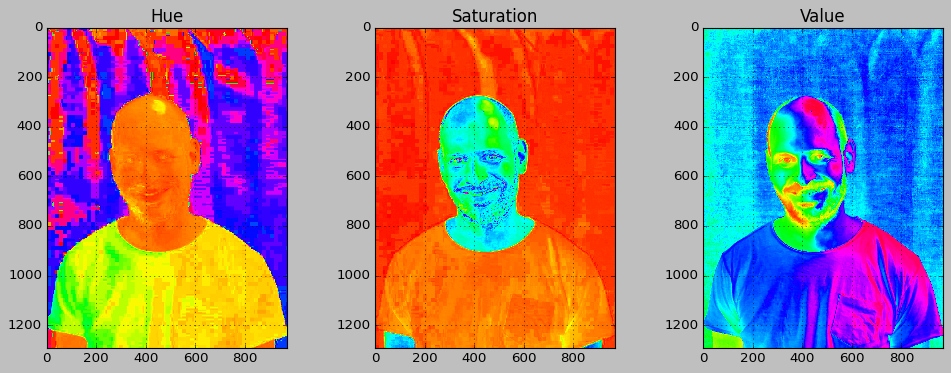

In [8]:
from skimage.color import rgb2hsv
pic = plt.imread('uri.jpeg') # RGB
 
#convert to hsv scale
pic_h= rgb2hsv(pic)
#graph per HSV Channel
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(pic_h[:,:,0], cmap='hsv')
ax[0].set_title('Hue',fontsize=15)
ax[1].imshow(pic_h[:,:,1], cmap='hsv')
ax[1].set_title('Saturation',fontsize=15)
ax[2].imshow(pic_h[:,:,2], cmap='hsv')
ax[2].set_title('Value',fontsize=15);


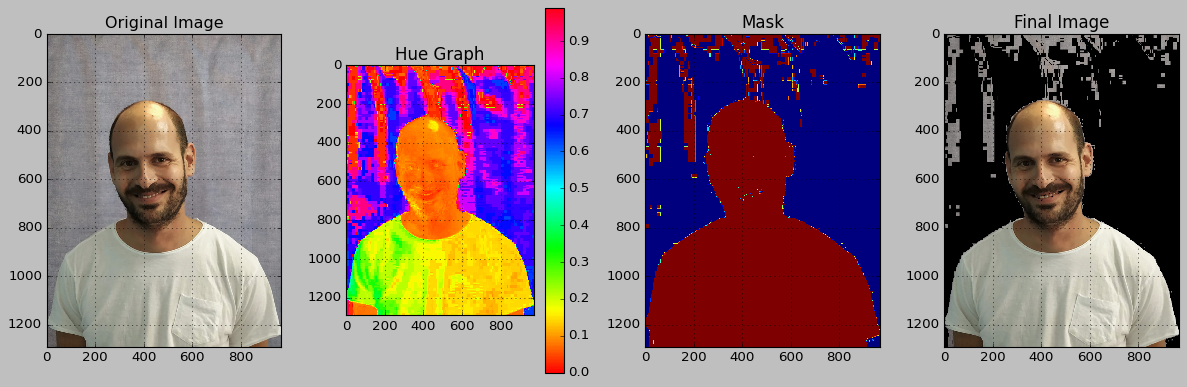

In [9]:
fig, ax = plt.subplots(1,4,figsize=(15,5))
ax[0].imshow(pic)
ax[0].set_title('Original Image')
im = ax[1].imshow(pic_h[:,:,0],cmap='hsv')
fig.colorbar(im,ax=ax[1])
ax[1].set_title('Hue Graph',fontsize=15)
#set the lower and upper mask based on hue colorbar value of the desired fruit
lower_mask = pic_h[:,:,0] > 0.03
upper_mask = pic_h[:,:,0] < 0.6
mask = upper_mask*lower_mask
# get the desired mask and show in original image
red = pic[:,:,0]*mask
green = pic[:,:,1]*mask
blue = pic[:,:,2]*mask
mask2 = np.dstack((red,green,blue))
ax[2].imshow(mask)
ax[3].imshow(mask2)
ax[2].set_title('Mask',fontsize=15)
ax[3].set_title('Final Image',fontsize=15)
plt.tight_layout()
plt.show()

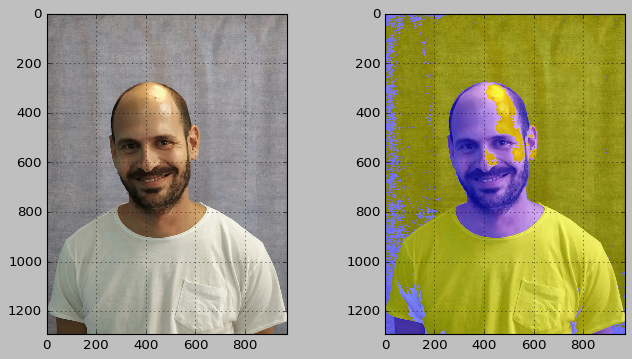

In [10]:
shift = 125
c = 2
x = np.arange(256).astype(int)
shift_dict = {i:j for i,j in zip (x, np.roll(x, shift).astype(int))}

pic_h = np.copy(pic)
df = pd.DataFrame(pic_h[:,:,c]).astype(int).replace(shift_dict)
pic_h[:,:,c] = df.values

fig, axes = plt.subplots(figsize = (10,5), ncols = 2)
for i, p in enumerate([pic, pic_h]):
    show(p, ax = axes[i])

# RG Chromaticity
https://towardsdatascience.com/image-segmentation-part-2-ea377218fb3f

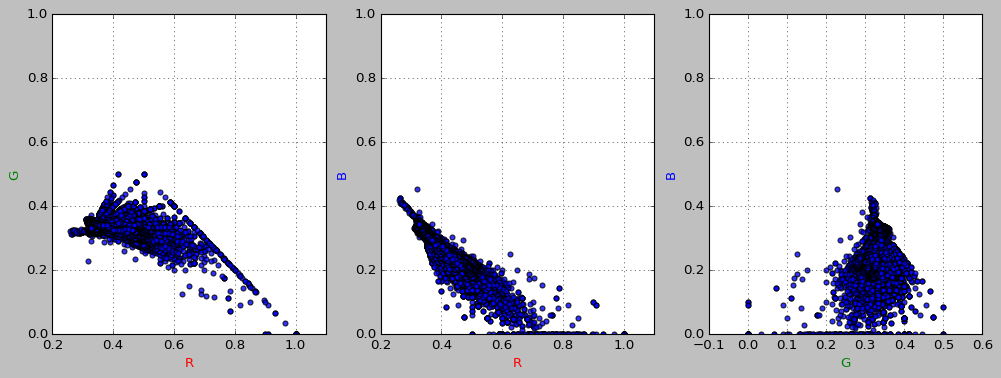

In [11]:
pic = plt.imread('uri.jpeg') # RGB

R = pic[..., 0] / pic.sum(axis = 2)
G = pic[..., 1] / pic.sum(axis = 2)
B = pic[..., 2] / pic.sum(axis = 2)

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,5))
ax1.scatter(R.flatten(),G.flatten(), edgecolor = 'black', alpha = 0.8)
ax1.set_ylim(0,1)
ax1.set_xlabel('R', color = 'red')
ax1.set_ylabel('G', color = 'green');

ax2.scatter(R.flatten(),B.flatten(), edgecolor = 'black', alpha = 0.8)
ax2.set_ylim(0,1)
ax2.set_xlabel('R', color = 'red')
ax2.set_ylabel('B', color = 'blue');

ax3.scatter(G.flatten(),B.flatten(), edgecolor = 'black', alpha = 0.8)
ax3.set_ylim(0,1)
ax3.set_xlabel('G', color = 'green')
ax3.set_ylabel('B', color = 'blue');

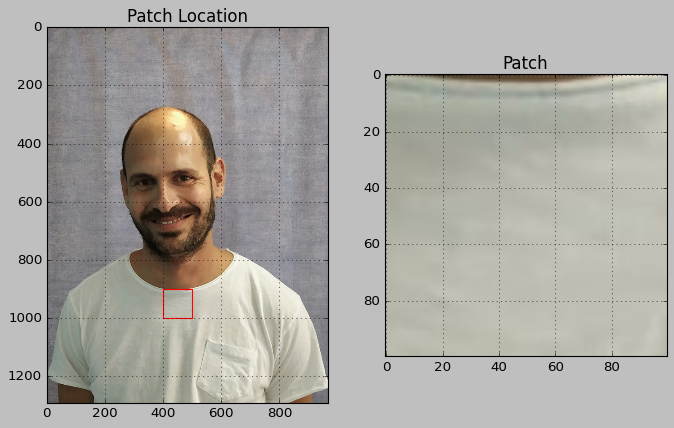

In [12]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic)
ax[0].add_patch(Rectangle((400, 900), 100, 100, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
patch = pic[900:1000, 400:500]
ax[1].imshow(patch)
ax[1].set_title('Patch',fontsize=15)
plt.show()

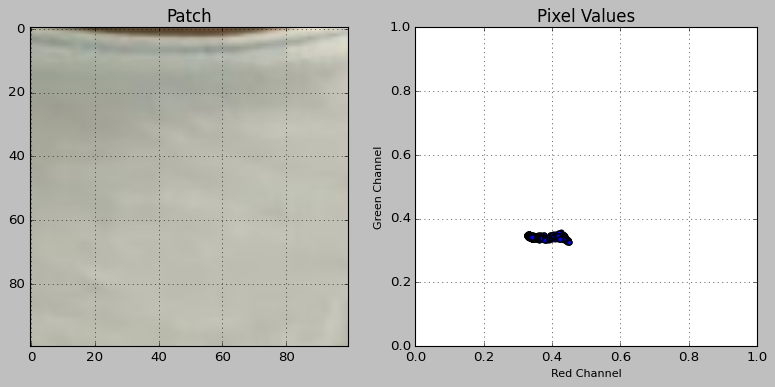

In [13]:
patch_R = patch[:,:,0]*1.0/patch.sum(axis=2)
patch_G = patch[:,:,1]*1.0/patch.sum(axis=2)
patch_B = patch[:,:,2]*1.0/patch.sum(axis=2)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(patch)
ax[1].scatter(patch_R.flatten(),patch_G.flatten())
ax[0].set_title('Patch',fontsize=15)
ax[1].set_title('Pixel Values',fontsize=15)
ax[1].set_xlabel('Red Channel',fontsize=10)
ax[1].set_ylabel('Green Channel',fontsize=10)
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
plt.tight_layout()
plt.show()

In [14]:
std_patch_R = np.std(patch_R.flatten())
mean_patch_R = np.mean(patch_R.flatten())
std_patch_G = np.std(patch_G.flatten())
mean_patch_G = np.mean(patch_G.flatten())
std_patch_B = np.std(patch_B.flatten())
mean_patch_B = np.mean(patch_B.flatten())


def gaussian(p,mean,std):
    return np.exp(-(p-mean)**2/(2*std**2))*(1/(std*((2*np.pi)**0.5)))

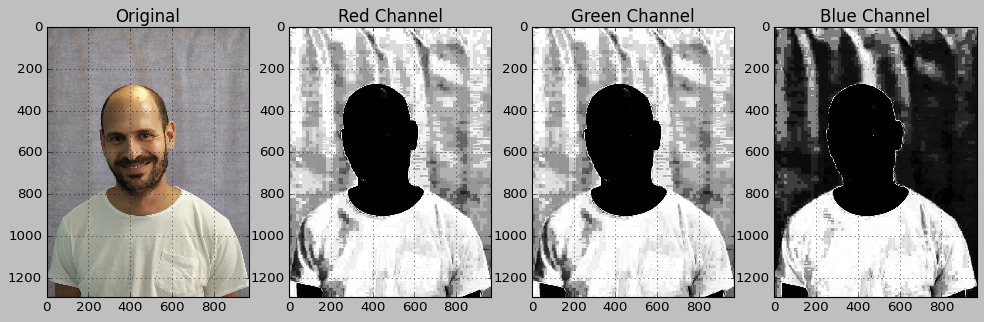

In [15]:
prob_R = gaussian(R,mean_patch_R,std_patch_R)
prob_G = gaussian(G,mean_patch_G,std_patch_G)
prob_B = gaussian(B,mean_patch_B,std_patch_B)
fig, ax = plt.subplots(1,4,figsize=(15,10))
ax[0].imshow(pic,cmap='gray')
ax[1].imshow(prob_R,cmap='gray')
ax[2].imshow(prob_R,cmap='gray')
ax[3].imshow(prob_B,cmap='gray')
ax[0].set_title('Original',fontsize=15)
ax[1].set_title('Red Channel',fontsize=15)
ax[2].set_title('Green Channel',fontsize=15)
ax[3].set_title('Blue Channel',fontsize=15)
plt.show()

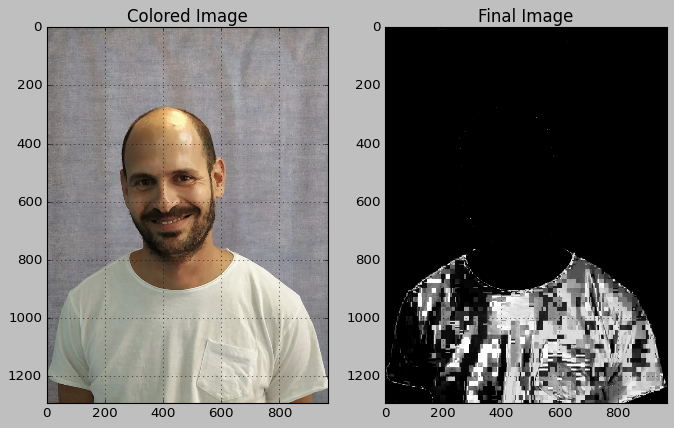

In [16]:
prob = prob_R * prob_G
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic)
ax[1].imshow(prob,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Final Image',fontsize=15)
plt.show()

     |████████████████████████████████| 26.9 MB 1.3 MB/s 


In [21]:
# from IPython.display import clear_output
# !pip install imageio-ffmpeg;
# # from moviepy.editor import ImageSequenceClip

# bw_pic = rgb2gray(pic)
# th = 1
# show(bw_pic)
# plt.show()
# frames = []
# for i in range(100):
    
#     new_pic = np.where(prob_R < th, bw_pic, 0)
    
#     clear_output(wait = True)
#     show(new_pic)
#     plt.show()
    
#     new_pic = np.expand_dims(new_pic, -1)
#     frames.append(new_pic)
    
#     th *= 0.1

# clip = ImageSequenceClip(list(frames), fps=20)
# clip.write_gif('test.gif', fps=20)

# A Beginner's guide to Deep Learning based Semantic Segmentation using Keras

https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html


In [22]:
import cv2
import numpy as np


ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1
ann_img[ 0 , 0 ] = 2 # this would set the label of pixel 0,0 as 2

cv2.imwrite( "ann_1.png" ,ann_img )

True

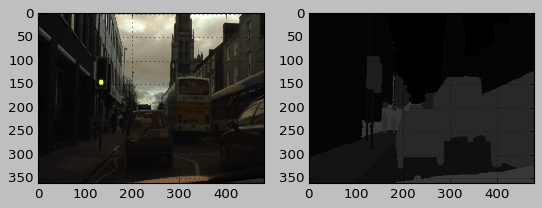

In [23]:
img = cv2.imread('dataset1/images_prepped_train/0001TP_006690.png')
seg = cv2.imread('dataset1/annotations_prepped_train/0001TP_006690.png')

fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(img)
ax2.imshow(seg / 50)

In [24]:
import imgaug as ia
import imgaug.augmenters as iaa

seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
#     iaa.Rotate(rotate = (-15, 15)) # randomly rotate between -15 to 15

])
def augment_seg( img , seg  ):

    aug_det = seq.to_deterministic() 
    image_aug = aug_det.augment_image( img )

    segmap = ia.SegmentationMapOnImage( seg , nb_classes=np.max(seg)+1 , shape=img.shape )
    segmap_aug = aug_det.augment_segmentation_maps( segmap )
    segmap_aug = segmap_aug.get_arr_int()

    return image_aug , segmap_aug

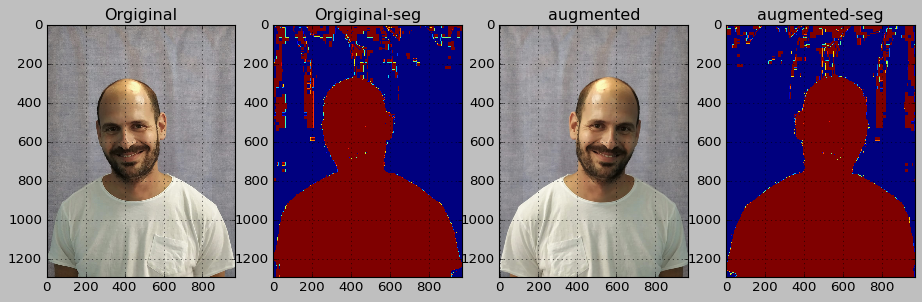

In [25]:
pic_aug, seg_aug = augment_seg(pic, mask)

fig, axes = plt.subplots(ncols = 4, figsize = (14,7))
for i,(p,t) in enumerate(zip([pic, mask, pic_aug, seg_aug], ['Orgiginal','Orgiginal-seg','augmented','augmented-seg'])):
    ax = axes.flatten()[i]
    ax.imshow(p)
    ax.set_title(t)
                     
                     

In [42]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, concatenate, UpSampling2D

!pip install keras_segmentation;
import keras_segmentation


In [51]:
# to solve some issues with keras.utils.get_file, you can run this 
file = '../../../../usr/local/lib/python3.7/dist-packages/keras_segmentation/models/vgg16.py'
with open(file,'r') as writer_file:
    contents_to_write = writer_file.read()
    contents_to_write = contents_to_write.replace("import keras", "import tensorflow.keras as keras")
with io.open(file,'w') as file_to_overwrite:
    file_to_overwrite.write(contents_to_write)

In [52]:
img_input = Input(shape=(360, 480 , 3 ))

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Dropout(0.2)(conv3)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

up1 = concatenate([UpSampling2D((2, 2))(conv3), conv2], axis=-1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
conv4 = Dropout(0.2)(conv4)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

up2 = concatenate([UpSampling2D((2, 2))(conv4), conv1], axis=-1)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

out = Conv2D( 5, (1, 1) , padding='same')(conv5)

from keras_segmentation.models.model_utils import get_segmentation_model

model = get_segmentation_model(img_input ,  out ) # this would build the segmentation model

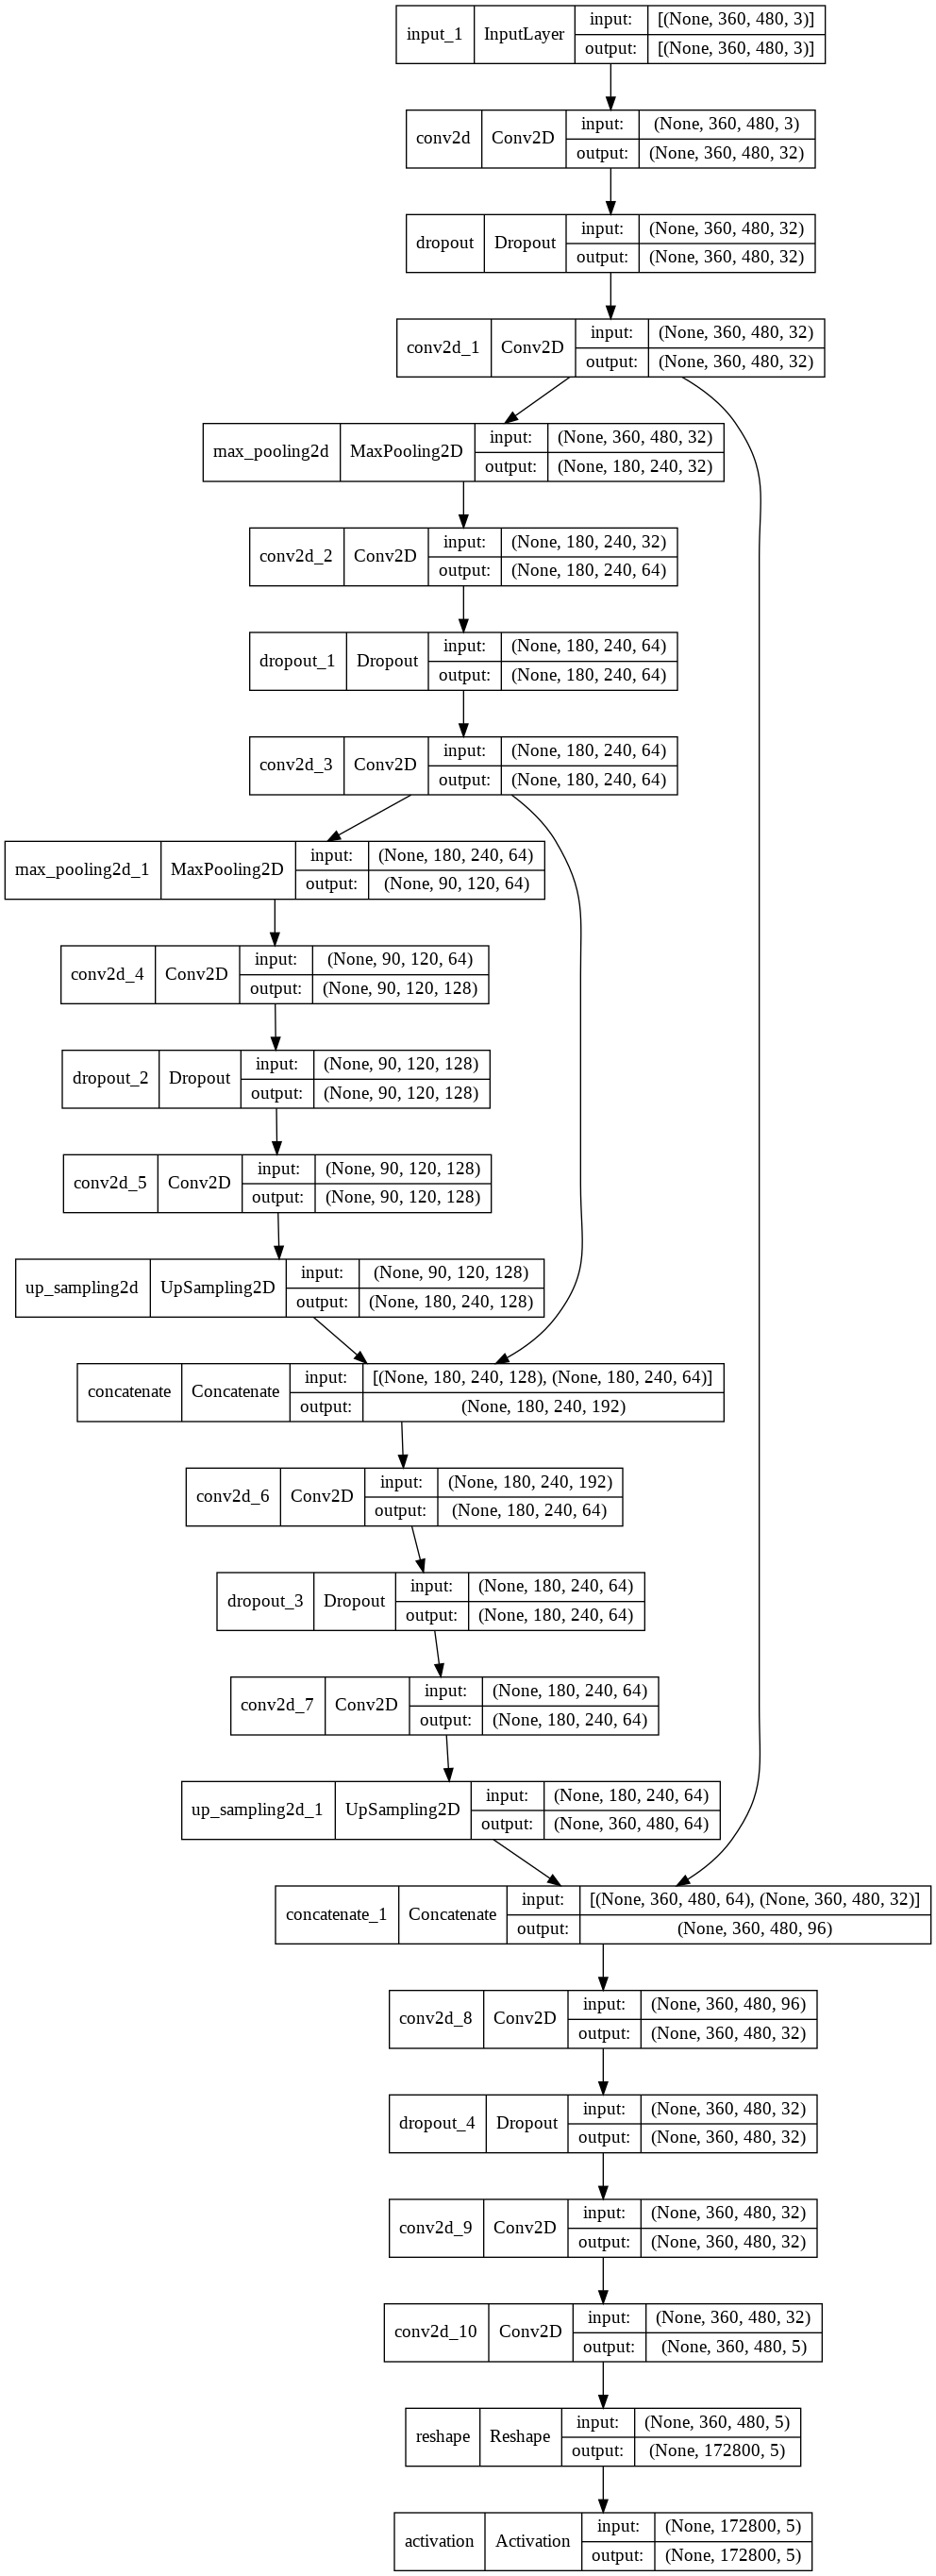

In [53]:
# keras.Model.summary(model)
keras.utils.plot_model(model, show_shapes = True)

In [54]:

from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes = 51, input_height = 416, input_width = 608)


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# # this file made some problems for some reason...

# from os import remove
# remove("dataset1/images_prepped_train/0016E5_01410.png")
# remove("dataset1/annotations_prepped_train/0016E5_01410.png")

In [75]:
model.train( 
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "checkpoints/vgg_unet_1" , 
    epochs=5,
    
)

Verifying training dataset


100%|██████████| 366/366 [00:13<00:00, 26.83it/s]
/usr/local/lib/python3.7/dist-packages/keras_segmentation/train.py:157: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epochs=epochs, callbacks=callbacks)


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 139s 240ms/step - loss: 4.2320 - accuracy: 0.0195
Epoch 2/5
512/512 [==============================] - 122s 238ms/step - loss: 3.5464 - accuracy: 0.3095
Epoch 3/5
512/512 [==============================] - 125s 245ms/step - loss: 3.0343 - accuracy: 0.4375
Epoch 4/5
512/512 [==============================] - 125s 245ms/step - loss: 2.6920 - accuracy: 0.4699
Epoch 5/5
512/512 [==============================] - 126s 246ms/step - loss: 2.4677 - accuracy: 0.4917


In [79]:
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="output.png"
)


Text(0.5, 1.0, 'annotation')

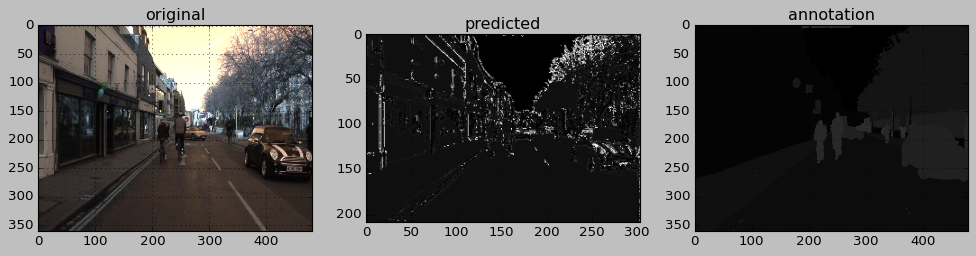

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,5))
img = cv2.imread('dataset1/images_prepped_test/0016E5_07965.png')
ax1.imshow(img)
ax1.set_title('original')
ax2.imshow(out, cmap = 'gray')
ax2.set_title('predicted')
seg = cv2.imread('dataset1/annotations_prepped_test/0016E5_07965.png')
ax3.imshow(seg*4, cmap = 'gray')
ax3.set_title('annotation')